In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
from sklearn.preprocessing import PolynomialFeatures

#this line is needed for matplotlib to show the histplot after df.hist
%matplotlib inline


warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
# setting views for pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# reading csv
df_in = pd.read_csv("../data/combined.csv")

In [4]:
# viewing csv
df_in

,Unnamed: 0,rightankle,leftankle,rightknee,leftknee,righthip,lefthip,rightshoulder,leftshoulder,curve
0,0,133.98,127.15,172.20,163.53,135.69,145.09,16.98,5.83,1
1,1,163.77,170.90,166.09,169.52,145.64,155.28,17.55,54.36,1
2,2,146.90,125.13,170.16,170.69,135.86,146.55,15.40,47.60,1
3,3,158.59,155.23,176.81,169.58,137.37,161.93,45.66,96.25,1
4,4,149.31,157.42,160.25,157.07,135.32,142.02,14.47,1.47,1
5,5,137.53,93.99,169.46,164.63,138.76,140.19,27.87,9.50,1
6,6,159.48,164.44,175.42,175.11,145.45,170.17,36.19,65.99,1
7,7,141.88,151.71,160.41,152.55,141.61,139.69,10.18,25.96,1
8,8,136.87,141.48,159.76,159.08,146.51,146.48,2.13,16.53,1
9,9,167.33,175.88,174.92,179.15,140.72,154.12,20.89,53.05,1


In [5]:
# copying out from original
df = df_in.copy()

In [6]:
# droping unwanted columns
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

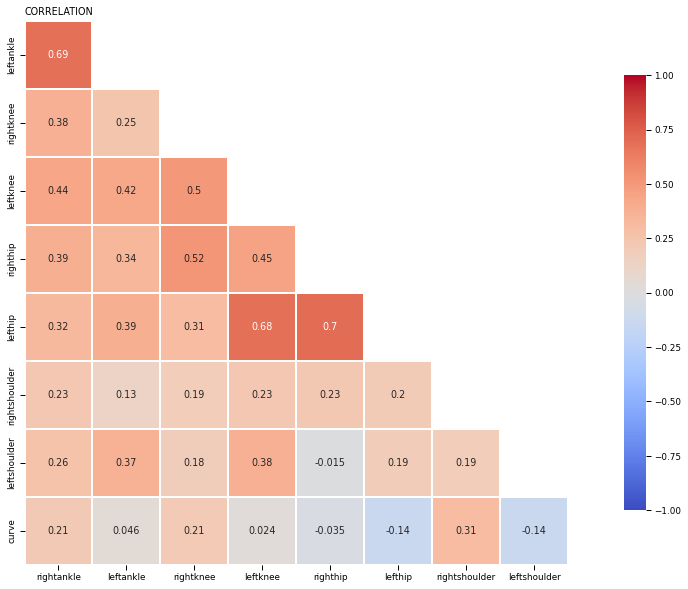

In [31]:
# viewing correlation between all features
df_corr = df.corr()
np.ones_like(df_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,10)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');
plt.savefig('../images/correlation_chart.jpg')

There's not much correlation between the separate angles and the curve balls.  
The highest correlations come from the arms interestingly.  
But the right hip and left hip have high correlation, and that is expected because when the hip is bent the other side will also be bent, it is impossible to only bend one side of your hip.  

The ankles also seem to have high correlation with each other.  

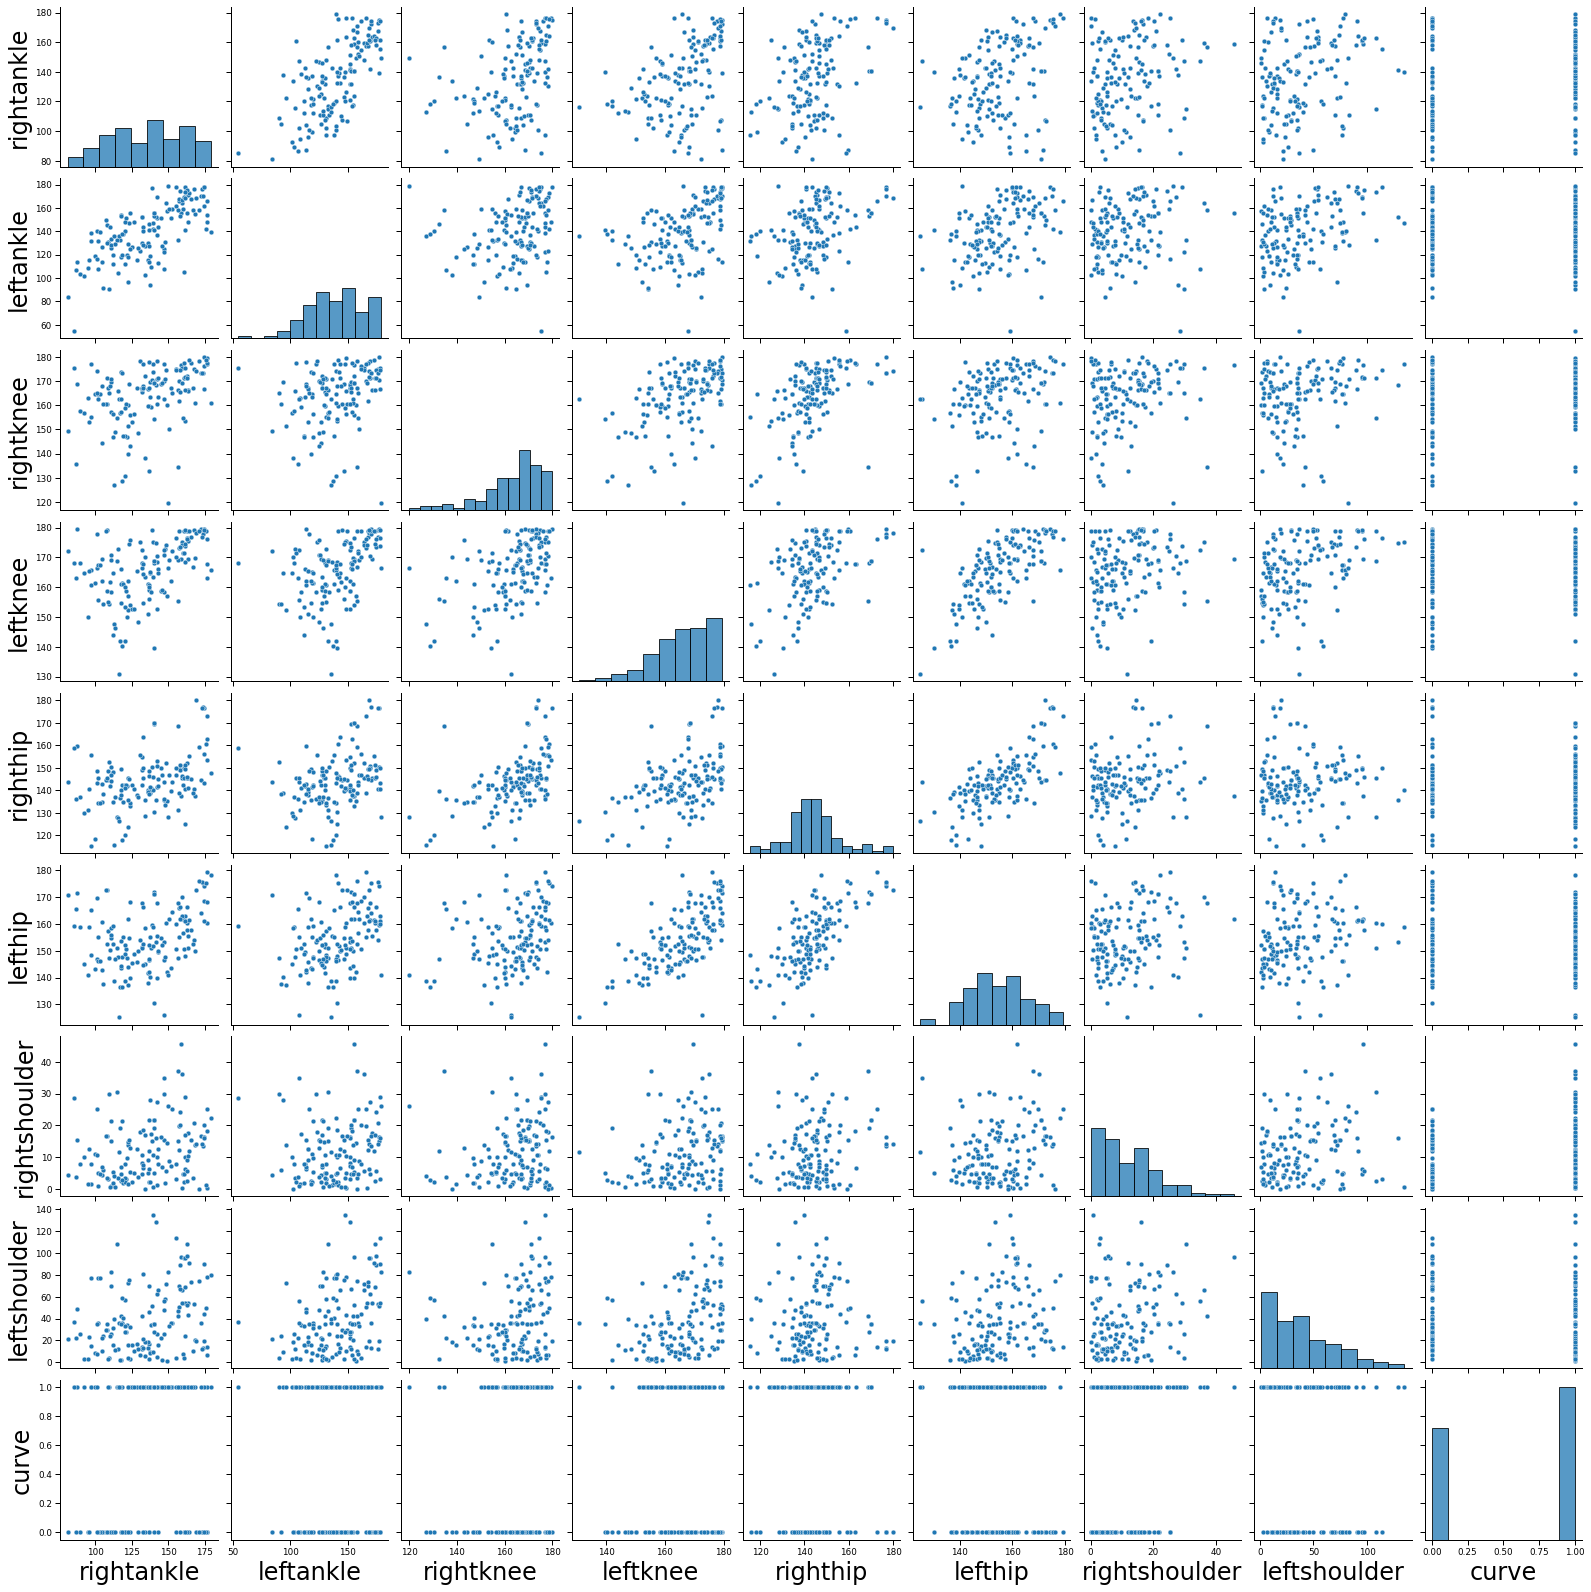

In [8]:
# looking ar pairplot to see of there are any interesting patterns
sns.set_context("paper", rc={"axes.labelsize":24})
sns.pairplot(df)

Can't really seem much correlation, but straight balls seem to have lower right shoulder angles as compared to curved balls.

# Feature Engineering

## Using sklearn's polynomial features

In [9]:
# naming features for multiplication
features = ["rightankle", "leftankle", "rightknee", "leftknee", "righthip", "lefthip", "rightshoulder", "leftshoulder"]
X = df[features]

In [10]:
# instantiating polynomial features
poly = PolynomialFeatures(include_bias = False)

In [11]:
X_poly = poly.fit_transform(X)

In [12]:
# checking df
df_poly = pd.DataFrame(X_poly, columns = poly.get_feature_names(features))
df_poly

,rightankle,leftankle,rightknee,leftknee,righthip,lefthip,rightshoulder,leftshoulder,rightankle^2,rightankle leftankle,rightankle rightknee,rightankle leftknee,rightankle righthip,rightankle lefthip,rightankle rightshoulder,rightankle leftshoulder,leftankle^2,leftankle rightknee,leftankle leftknee,leftankle righthip,leftankle lefthip,leftankle rightshoulder,leftankle leftshoulder,rightknee^2,rightknee leftknee,rightknee righthip,rightknee lefthip,rightknee rightshoulder,rightknee leftshoulder,leftknee^2,leftknee righthip,leftknee lefthip,leftknee rightshoulder,leftknee leftshoulder,righthip^2,righthip lefthip,righthip rightshoulder,righthip leftshoulder,lefthip^2,lefthip rightshoulder,lefthip leftshoulder,rightshoulder^2,rightshoulder leftshoulder,leftshoulder^2
0,133.98,127.15,172.20,163.53,135.69,145.09,16.98,5.83,17950.6404,17035.5570,23071.3560,21909.7494,18179.7462,19439.1582,2274.9804,781.1034,16167.1225,21895.2300,20792.8395,17252.9835,18448.1935,2159.0070,741.2845,29652.8400,28159.8660,23365.8180,24984.4980,2923.9560,1003.9260,26742.0609,22189.3857,23726.5677,2776.7394,953.3799,18411.7761,19687.2621,2304.0162,791.0727,21051.1081,2463.6282,845.8747,288.3204,98.9934,33.9889
1,163.77,170.90,166.09,169.52,145.64,155.28,17.55,54.36,26820.6129,27988.2930,27200.5593,27762.2904,23851.4628,25430.2056,2874.1635,8902.5372,29206.8100,28384.7810,28970.9680,24889.8760,26537.3520,2999.2950,9290.1240,27585.8881,28155.5768,24189.3476,25790.4552,2914.8795,9028.6524,28737.0304,24688.8928,26323.0656,2975.0760,9215.1072,21211.0096,22614.9792,2555.9820,7916.9904,24111.8784,2725.1640,8441.0208,308.0025,954.0180,2955.0096
2,146.90,125.13,170.16,170.69,135.86,146.55,15.40,47.60,21579.6100,18381.5970,24996.5040,25074.3610,19957.8340,21528.1950,2262.2600,6992.4400,15657.5169,21292.1208,21358.4397,17000.1618,18337.8015,1927.0020,5956.1880,28954.4256,29044.6104,23117.9376,24936.9480,2620.4640,8099.6160,29135.0761,23189.9434,25014.6195,2628.6260,8124.8440,18457.9396,19910.2830,2092.2440,6466.9360,21476.9025,2256.8700,6975.7800,237.1600,733.0400,2265.7600
3,158.59,155.23,176.81,169.58,137.37,161.93,45.66,96.25,25150.7881,24617.9257,28040.2979,26893.6922,21785.5083,25680.4787,7241.2194,15264.2875,24096.3529,27446.2163,26323.9034,21323.9451,25136.3939,7087.8018,14940.8875,31261.7761,29983.4398,24288.3897,28630.8433,8073.1446,17017.9625,28757.3764,23295.2046,27460.0894,7743.0228,16322.0750,18870.5169,22244.3241,6272.3142,13221.8625,26221.3249,7393.7238,15585.7625,2084.8356,4394.7750,9264.0625
4,149.31,157.42,160.25,157.07,135.32,142.02,14.47,1.47,22293.4761,23504.3802,23926.9275,23452.1217,20204.6292,21205.0062,2160.5157,219.4857,24781.0564,25226.5550,24725.9594,21302.0744,22356.7884,2277.8674,231.4074,25680.0625,25170.4675,21685.0300,22758.7050,2318.8175,235.5675,24670.9849,21254.7124,22307.0814,2272.8029,230.8929,18311.5024,19218.1464,1958.0804,198.9204,20169.6804,2055.0294,208.7694,209.3809,21.2709,2.1609
5,137.53,93.99,169.46,164.63,138.76,140.19,27.87,9.50,18914.5009,12926.4447,23305.8338,22641.5639,19083.6628,19280.3307,3832.9611,1306.5350,8834.1201,15927.5454,15473.5737,13042.0524,13176.4581,2619.5013,892.9050,28716.6916,27898.1998,23514.2696,23756.5974,4722.8502,1609.8700,27103.0369,22844.0588,23079.4797,4588.2381,1563.9850,19254.3376,19452.7644,3867.2412,1318.2200,19653.2361,3907.0953,1331.8050,776.7369,264.7650,90.2500
6,159.48,164.44,175.42,175.11,145.45,170.17,36.19,65.99,25433.8704,26224.8912,27975.9816,27926.5428,23196.3660,27138.7116,5771.5812,10524.0852,27040.5136,28846.0648,28795.0884,23917.7980,27982.7548,5951.0836,10851.3956,30772.1764,30717.7962,25514.8390,29851.2214,6348.4498,11575.9658,30663.5121,25469.7495,29798.4687,6337.2309,11555.5089,21155.7025,24751.2265,5263.8355,9598.2455,28957.8289,6158.4523,11229.5183,1309.7161,2388.1781,4354.6801
7,141.88,151.71,160.41,152.55,141.61,139.69,10.18,25.96,20129.9344,21524.6148,22758.9708,21643.7940,20091.6268,19819.2172,1444.3384,3683.2048,23015.9241,24335.8011,23143.3605,21483.6531,21192.3

In [13]:
df_poly.shape

(142, 44)

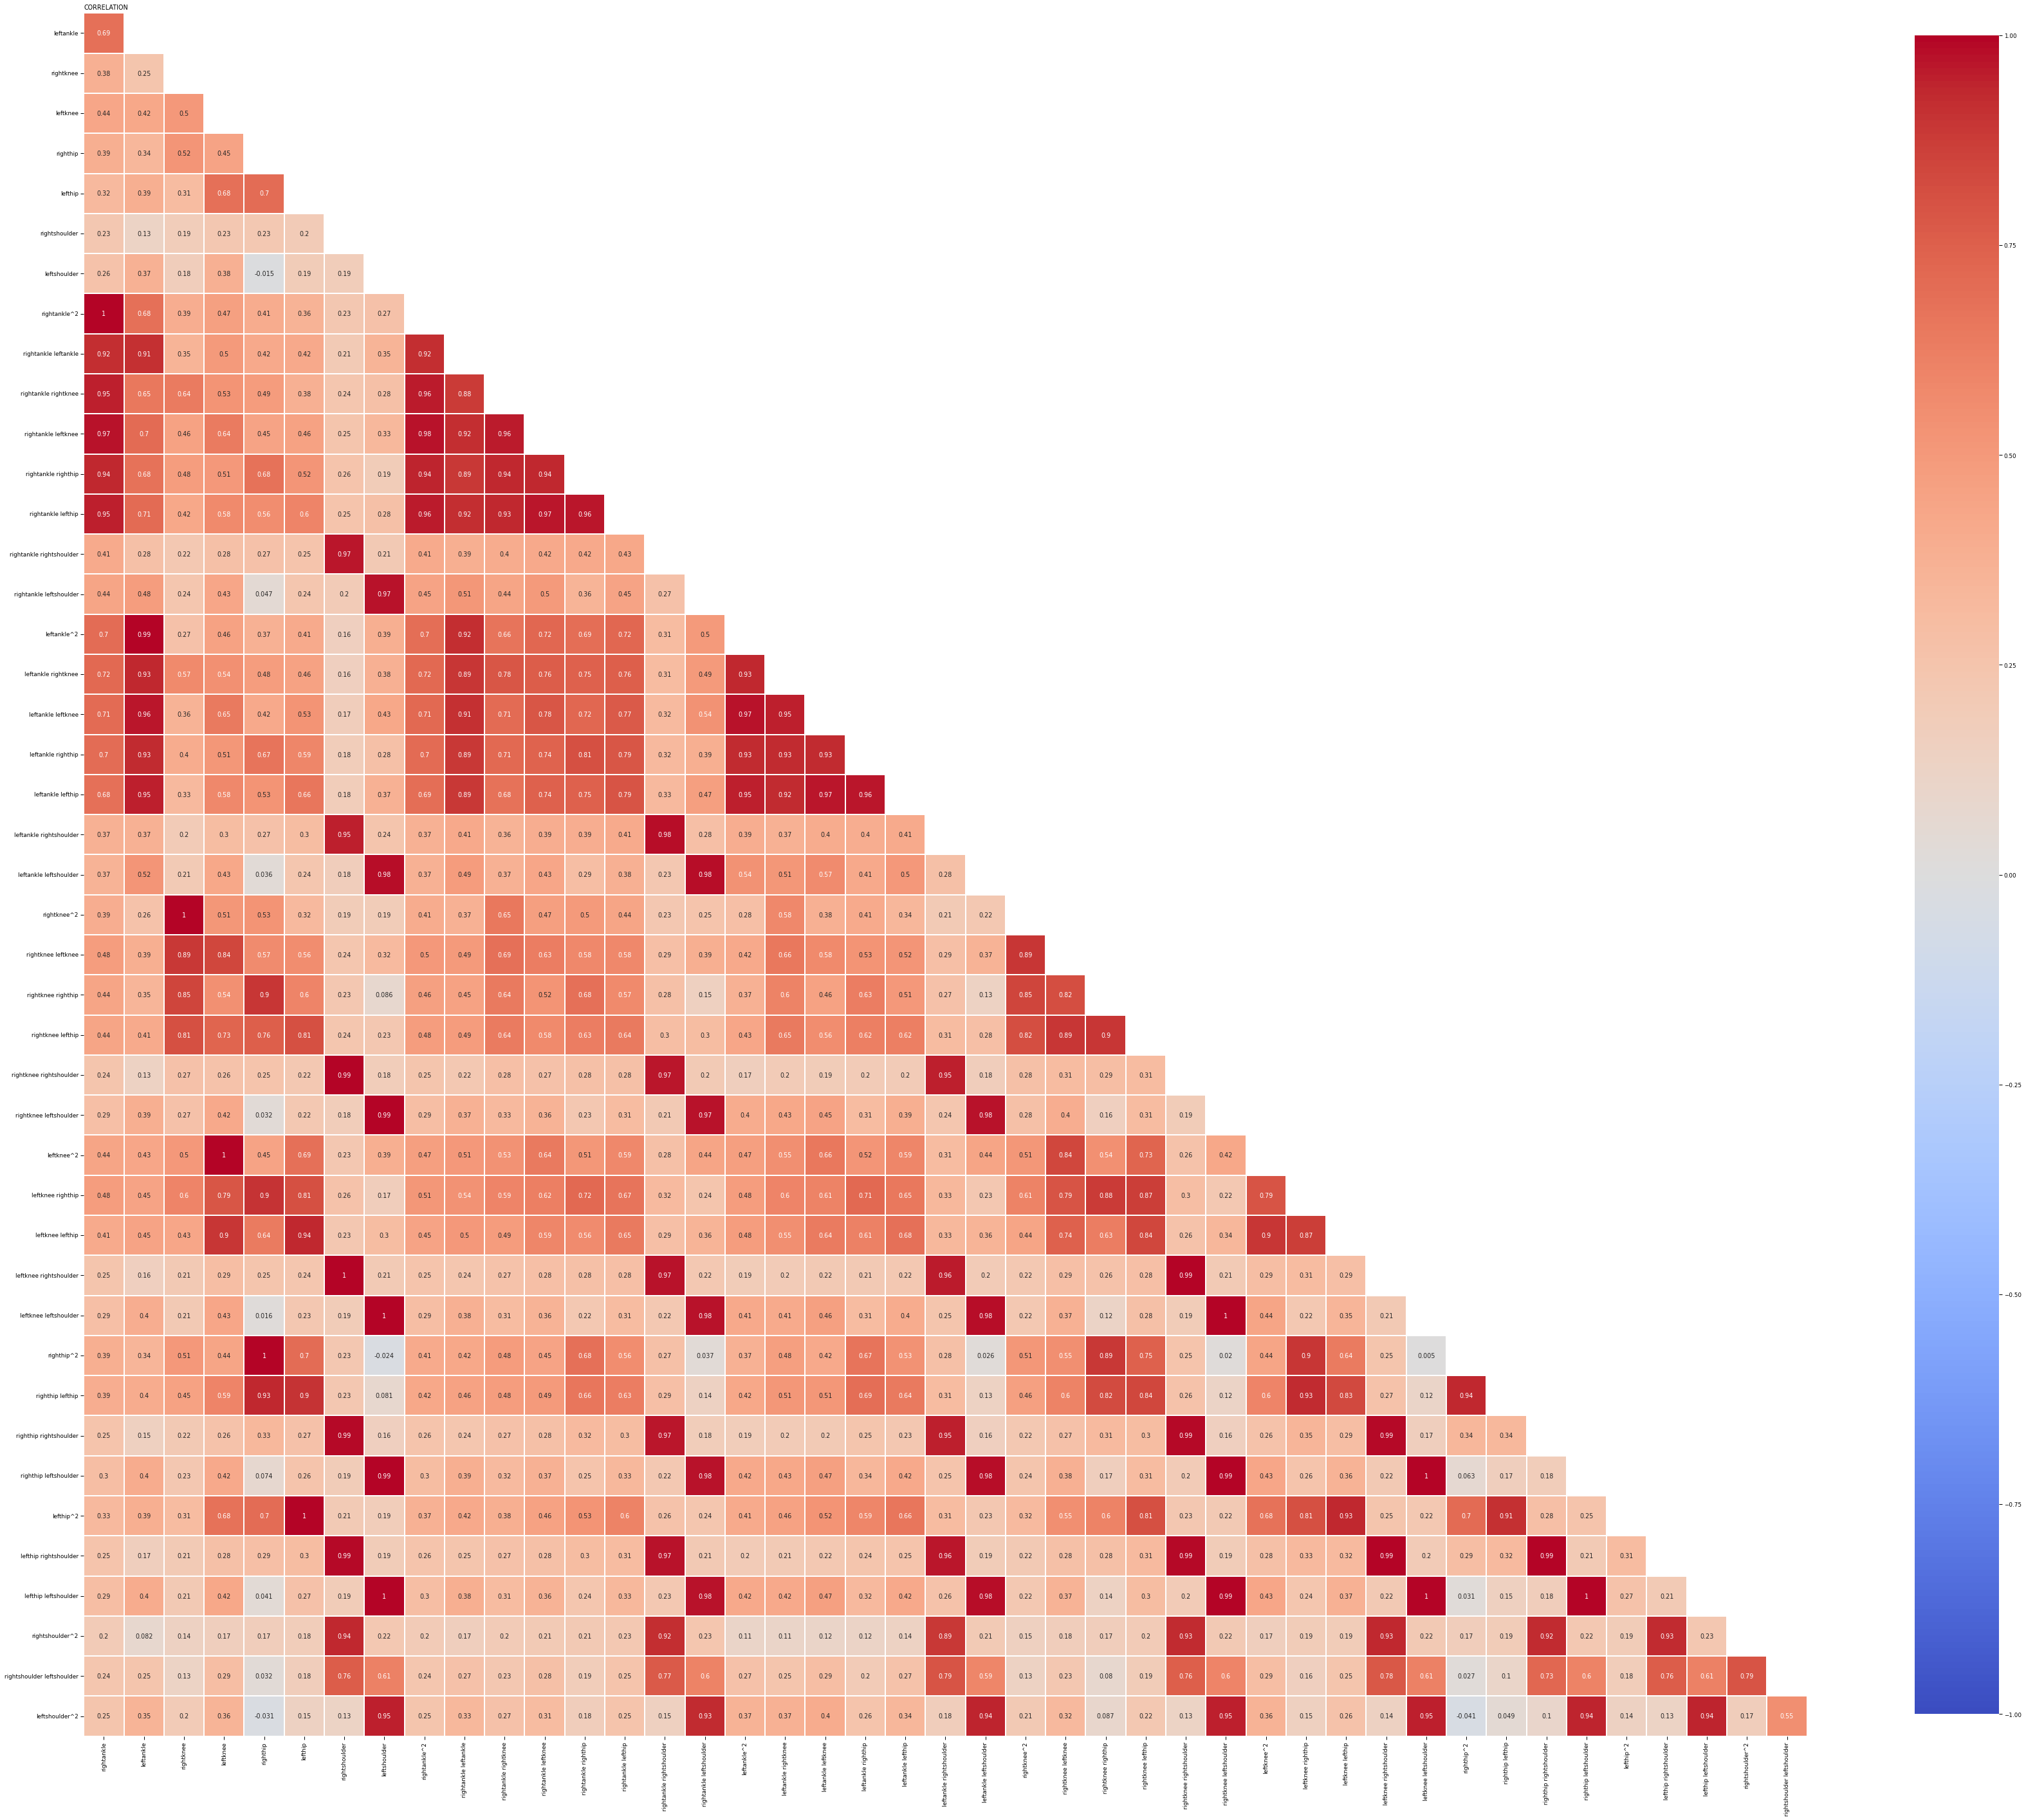

In [14]:
# viewing correlation between all features
df_poly_corr = df_poly.corr()
np.ones_like(df_poly_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df_poly_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df_poly_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(60,60)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');

The correlation matrix is too small, i will have to split the df.

In [15]:
# splitting df
df1 = df_poly.iloc[: , 0:19]

In [16]:
# splitting df
df2 = df_poly.iloc[: , 20:39]

In [17]:
# splitting df
df3 = df_poly.iloc[: , 40:59]

In [18]:
# inputting curve into dfs
df1['curve'] = df_in['curve'].copy()
df2['curve'] = df_in['curve'].copy()
df3['curve'] = df_in['curve'].copy()

<ipython-input-18-5df0d52a7dba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['curve'] = df_in['curve'].copy()
<ipython-input-18-5df0d52a7dba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['curve'] = df_in['curve'].copy()
<ipython-input-18-5df0d52a7dba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [19]:
df1

,rightankle,leftankle,rightknee,leftknee,righthip,lefthip,rightshoulder,leftshoulder,rightankle^2,rightankle leftankle,rightankle rightknee,rightankle leftknee,rightankle righthip,rightankle lefthip,rightankle rightshoulder,rightankle leftshoulder,leftankle^2,leftankle rightknee,leftankle leftknee,curve
0,133.98,127.15,172.20,163.53,135.69,145.09,16.98,5.83,17950.6404,17035.5570,23071.3560,21909.7494,18179.7462,19439.1582,2274.9804,781.1034,16167.1225,21895.2300,20792.8395,1
1,163.77,170.90,166.09,169.52,145.64,155.28,17.55,54.36,26820.6129,27988.2930,27200.5593,27762.2904,23851.4628,25430.2056,2874.1635,8902.5372,29206.8100,28384.7810,28970.9680,1
2,146.90,125.13,170.16,170.69,135.86,146.55,15.40,47.60,21579.6100,18381.5970,24996.5040,25074.3610,19957.8340,21528.1950,2262.2600,6992.4400,15657.5169,21292.1208,21358.4397,1
3,158.59,155.23,176.81,169.58,137.37,161.93,45.66,96.25,25150.7881,24617.9257,28040.2979,26893.6922,21785.5083,25680.4787,7241.2194,15264.2875,24096.3529,27446.2163,26323.9034,1
4,149.31,157.42,160.25,157.07,135.32,142.02,14.47,1.47,22293.4761,23504.3802,23926.9275,23452.1217,20204.6292,21205.0062,2160.5157,219.4857,24781.0564,25226.5550,24725.9594,1
5,137.53,93.99,169.46,164.63,138.76,140.19,27.87,9.50,18914.5009,12926.4447,23305.8338,22641.5639,19083.6628,19280.3307,3832.9611,1306.5350,8834.1201,15927.5454,15473.5737,1
6,159.48,164.44,175.42,175.11,145.45,170.17,36.19,65.99,25433.8704,26224.8912,27975.9816,27926.5428,23196.3660,27138.7116,5771.5812,10524.0852,27040.5136,28846.0648,28795.0884,1
7,141.88,151.71,160.41,152.55,141.61,139.69,10.18,25.96,20129.9344,21524.6148,22758.9708,21643.7940,20091.6268,19819.2172,1444.3384,3683.2048,23015.9241,24335.8011,23143.3605,1
8,136.87,141.48,159.76,159.08,146.51,146.48,2.13,16.53,18733.3969,19364.3676,21866.3512,21773.2796,20052.8237,20048.7176,291.5331,2262.4611,20016.5904,22602.8448,22506.6384,1
9,167.33,175.88,174.92,179.15,140.72,154.12,20.89,53.05,27999.3289,29430.0004,29269.3636,29977.1695,23546.6776,25788.8996,3495.5237,8876.8565,30933.7744,30764.9296,31508.9020,1


In [20]:
df2

,leftankle lefthip,leftankle rightshoulder,leftankle leftshoulder,rightknee^2,rightknee leftknee,rightknee righthip,rightknee lefthip,rightknee rightshoulder,rightknee leftshoulder,leftknee^2,leftknee righthip,leftknee lefthip,leftknee rightshoulder,leftknee leftshoulder,righthip^2,righthip lefthip,righthip rightshoulder,righthip leftshoulder,lefthip^2,curve
0,18448.1935,2159.0070,741.2845,29652.8400,28159.8660,23365.8180,24984.4980,2923.9560,1003.9260,26742.0609,22189.3857,23726.5677,2776.7394,953.3799,18411.7761,19687.2621,2304.0162,791.0727,21051.1081,1
1,26537.3520,2999.2950,9290.1240,27585.8881,28155.5768,24189.3476,25790.4552,2914.8795,9028.6524,28737.0304,24688.8928,26323.0656,2975.0760,9215.1072,21211.0096,22614.9792,2555.9820,7916.9904,24111.8784,1
2,18337.8015,1927.0020,5956.1880,28954.4256,29044.6104,23117.9376,24936.9480,2620.4640,8099.6160,29135.0761,23189.9434,25014.6195,2628.6260,8124.8440,18457.9396,19910.2830,2092.2440,6466.9360,21476.9025,1
3,25136.3939,7087.8018,14940.8875,31261.7761,29983.4398,24288.3897,28630.8433,8073.1446,17017.9625,28757.3764,23295.2046,27460.0894,7743.0228,16322.0750,18870.5169,22244.3241,6272.3142,13221.8625,26221.3249,1
4,22356.7884,2277.8674,231.4074,25680.0625,25170.4675,21685.0300,22758.7050,2318.8175,235.5675,24670.9849,21254.7124,22307.0814,2272.8029,230.8929,18311.5024,19218.1464,1958.0804,198.9204,20169.6804,1
5,13176.4581,2619.5013,892.9050,28716.6916,27898.1998,23514.2696,23756.5974,4722.8502,1609.8700,27103.0369,22844.0588,23079.4797,4588.2381,1563.9850,19254.3376,19452.7644,3867.2412,1318.2200,19653.2361,1
6,27982.7548,5951.0836,10851.3956,30772.1764,30717.7962,25514.8390,29851.2214,6348.4498,11575.9658,30663.5121,25469.7495,29798.4687,6337.2309,11555.5089,21155.7025,24751.2265,5263.8355,9598.2455,28957.8289,1
7,21192.3699,1544.4078,3938.3916,25731.3681,24470.5455,22715.6601,22407.6729,1632.9738,4164.2436,23271.5025,21602.6055,21309.7095,1552.9590,3960.1980,20053.3921,19781.5009,1441.5898,3676.1956,19513.2961,1
8,20723.9904,301.3524,2338.6644,25523.2576,25414.6208,23406.4376,23401.6448,340.2888,2640.8328,25306.4464,23306.8108,23302.0384,338.8404,2629.5924,21465.1801,21460.7848,312.0663,2421.8103,21456.3904,1
9,27106.6256,3674.1332,9330.4340,30597.0064,31336.9180,24614.7424,26958.6704,3654.0788,9279.5060,32094.7225,25209.9880,27610.5980,3742.4435,9503.9075,19802.1184,21687.7664,2939.6408,7465.1960,23752.9744,1


In [21]:
df3

,lefthip leftshoulder,rightshoulder^2,rightshoulder leftshoulder,leftshoulder^2,curve
0,845.8747,288.3204,98.9934,33.9889,1
1,8441.0208,308.0025,954.0180,2955.0096,1
2,6975.7800,237.1600,733.0400,2265.7600,1
3,15585.7625,2084.8356,4394.7750,9264.0625,1
4,208.7694,209.3809,21.2709,2.1609,1
5,1331.8050,776.7369,264.7650,90.2500,1
6,11229.5183,1309.7161,2388.1781,4354.6801,1
7,3626.3524,103.6324,264.2728,673.9216,1
8,2421.3144,4.5369,35.2089,273.2409,1
9,8176.0660,436.3921,1108.2145,2814.3025,1


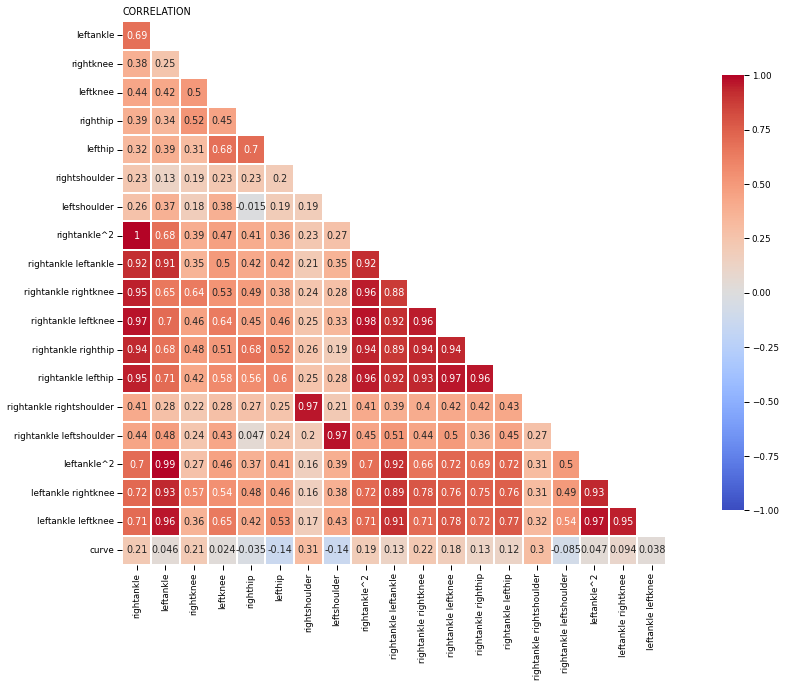

In [22]:
# viewing correlation between all features
df1_corr = df1.corr()
np.ones_like(df1_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df1_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df1_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,10)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');

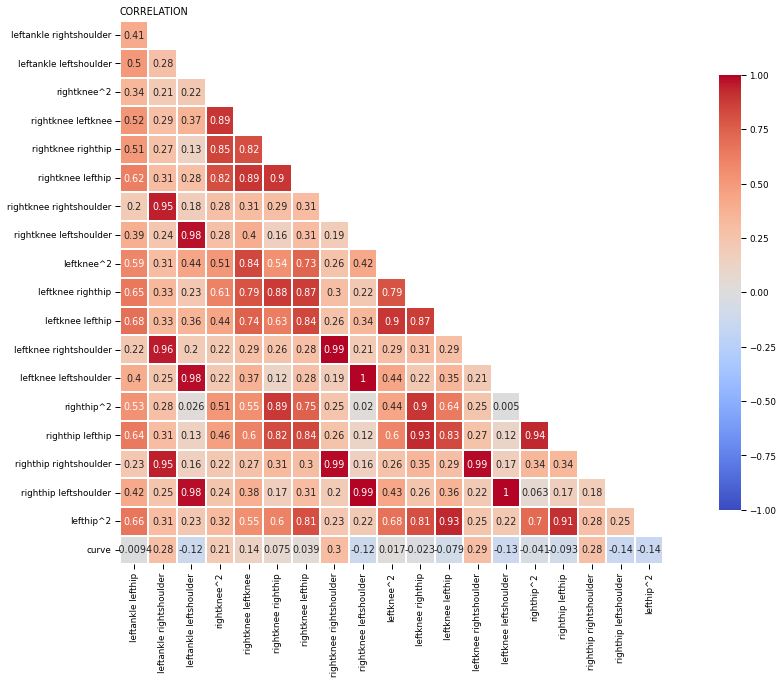

In [23]:
# viewing correlation between all features
df2_corr = df2.corr()
np.ones_like(df2_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df2_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df2_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,10)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');

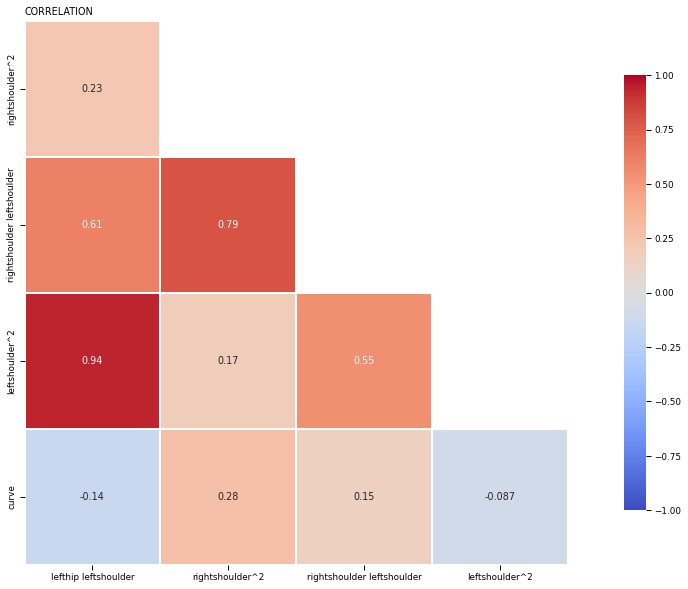

In [24]:
# viewing correlation between all features
df3_corr = df3.corr()
np.ones_like(df3_corr, dtype=np.bool)
mask = np.triu(np.ones_like(df3_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df3_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(20,10)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');

### Even with polynomial features, there does not seem to be much correlation between curves and the angles

In [25]:
# dropping features that are squared
tobe_dropped = ["rightankle^2", "leftankle^2", "rightknee^2", "leftknee^2", 
                "righthip^2", "lefthip^2", "rightshoulder^2", "leftshoulder^2"]

In [26]:
df_poly.drop(columns = tobe_dropped, axis = 1, inplace = True)

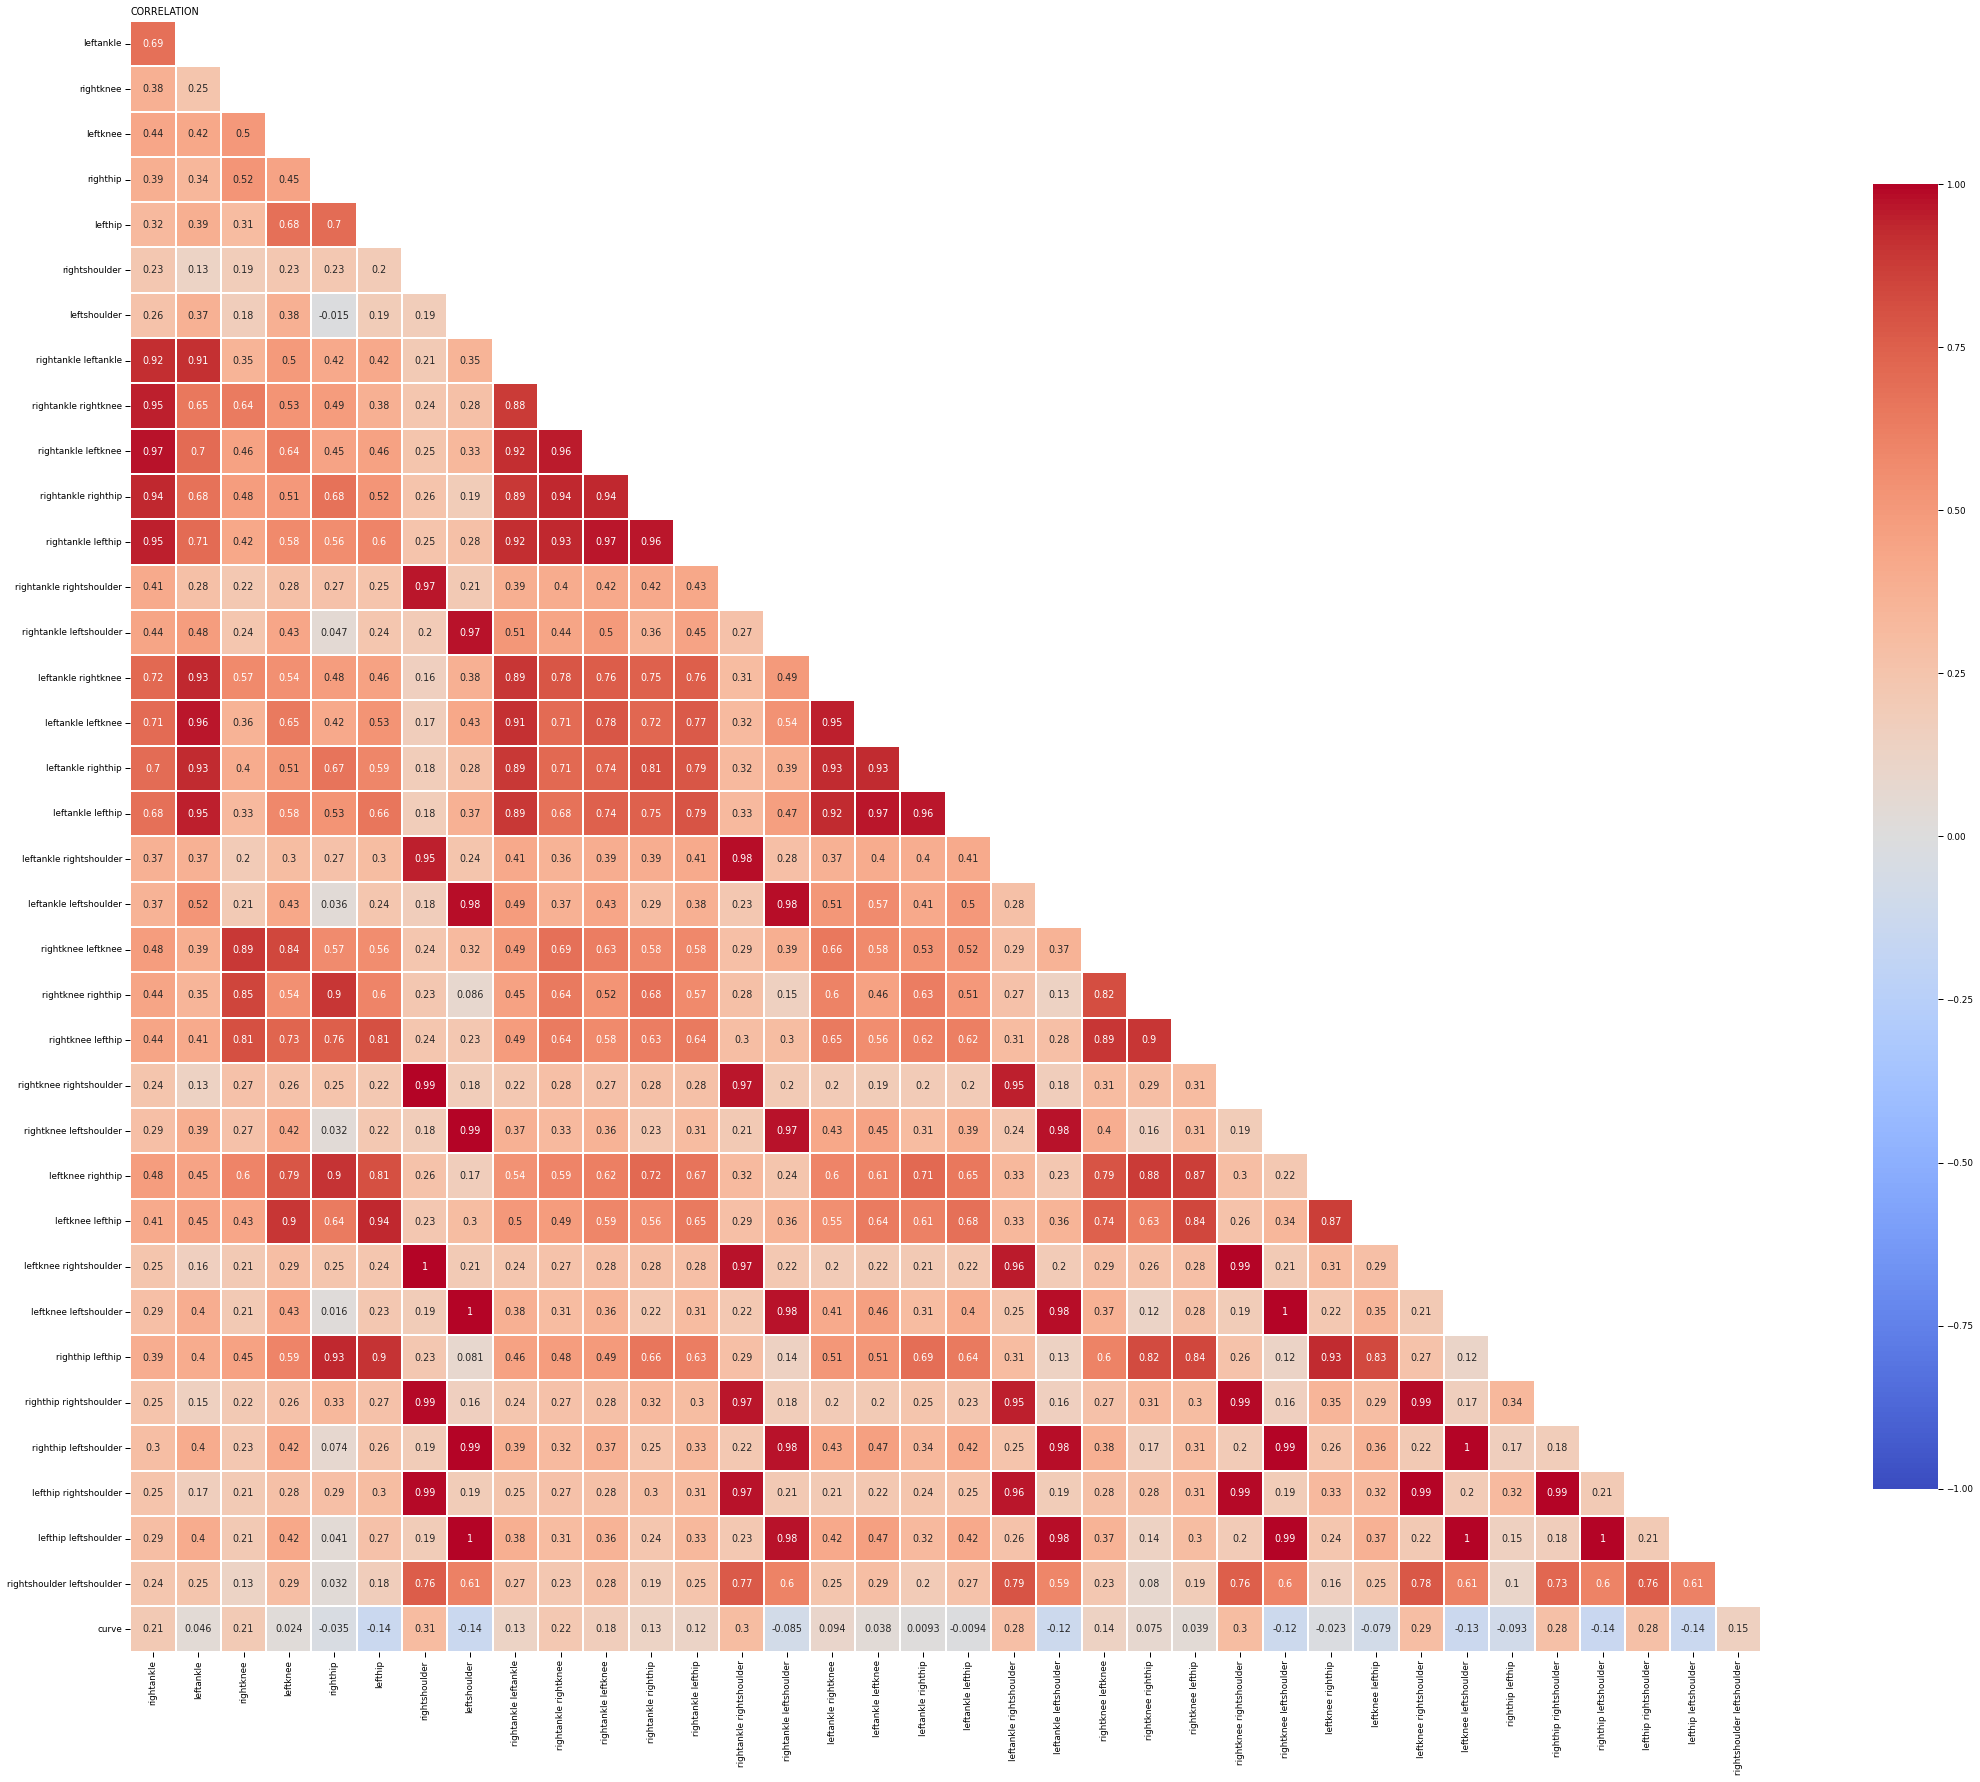

In [34]:
# viewing correlation between all features
poly_corr = df_poly.corr()
np.ones_like(poly_corr, dtype=np.bool)
mask = np.triu(np.ones_like(poly_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = poly_corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(40,30)) 
title = 'Correlation'.upper()
plt.title(title, loc='left')
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, linewidth=0.3, square=True, cbar_kws={"shrink": .8}, cmap='coolwarm');

In [27]:
df_poly

,rightankle,leftankle,rightknee,leftknee,righthip,lefthip,rightshoulder,leftshoulder,rightankle leftankle,rightankle rightknee,rightankle leftknee,rightankle righthip,rightankle lefthip,rightankle rightshoulder,rightankle leftshoulder,leftankle rightknee,leftankle leftknee,leftankle righthip,leftankle lefthip,leftankle rightshoulder,leftankle leftshoulder,rightknee leftknee,rightknee righthip,rightknee lefthip,rightknee rightshoulder,rightknee leftshoulder,leftknee righthip,leftknee lefthip,leftknee rightshoulder,leftknee leftshoulder,righthip lefthip,righthip rightshoulder,righthip leftshoulder,lefthip rightshoulder,lefthip leftshoulder,rightshoulder leftshoulder
0,133.98,127.15,172.20,163.53,135.69,145.09,16.98,5.83,17035.5570,23071.3560,21909.7494,18179.7462,19439.1582,2274.9804,781.1034,21895.2300,20792.8395,17252.9835,18448.1935,2159.0070,741.2845,28159.8660,23365.8180,24984.4980,2923.9560,1003.9260,22189.3857,23726.5677,2776.7394,953.3799,19687.2621,2304.0162,791.0727,2463.6282,845.8747,98.9934
1,163.77,170.90,166.09,169.52,145.64,155.28,17.55,54.36,27988.2930,27200.5593,27762.2904,23851.4628,25430.2056,2874.1635,8902.5372,28384.7810,28970.9680,24889.8760,26537.3520,2999.2950,9290.1240,28155.5768,24189.3476,25790.4552,2914.8795,9028.6524,24688.8928,26323.0656,2975.0760,9215.1072,22614.9792,2555.9820,7916.9904,2725.1640,8441.0208,954.0180
2,146.90,125.13,170.16,170.69,135.86,146.55,15.40,47.60,18381.5970,24996.5040,25074.3610,19957.8340,21528.1950,2262.2600,6992.4400,21292.1208,21358.4397,17000.1618,18337.8015,1927.0020,5956.1880,29044.6104,23117.9376,24936.9480,2620.4640,8099.6160,23189.9434,25014.6195,2628.6260,8124.8440,19910.2830,2092.2440,6466.9360,2256.8700,6975.7800,733.0400
3,158.59,155.23,176.81,169.58,137.37,161.93,45.66,96.25,24617.9257,28040.2979,26893.6922,21785.5083,25680.4787,7241.2194,15264.2875,27446.2163,26323.9034,21323.9451,25136.3939,7087.8018,14940.8875,29983.4398,24288.3897,28630.8433,8073.1446,17017.9625,23295.2046,27460.0894,7743.0228,16322.0750,22244.3241,6272.3142,13221.8625,7393.7238,15585.7625,4394.7750
4,149.31,157.42,160.25,157.07,135.32,142.02,14.47,1.47,23504.3802,23926.9275,23452.1217,20204.6292,21205.0062,2160.5157,219.4857,25226.5550,24725.9594,21302.0744,22356.7884,2277.8674,231.4074,25170.4675,21685.0300,22758.7050,2318.8175,235.5675,21254.7124,22307.0814,2272.8029,230.8929,19218.1464,1958.0804,198.9204,2055.0294,208.7694,21.2709
5,137.53,93.99,169.46,164.63,138.76,140.19,27.87,9.50,12926.4447,23305.8338,22641.5639,19083.6628,19280.3307,3832.9611,1306.5350,15927.5454,15473.5737,13042.0524,13176.4581,2619.5013,892.9050,27898.1998,23514.2696,23756.5974,4722.8502,1609.8700,22844.0588,23079.4797,4588.2381,1563.9850,19452.7644,3867.2412,1318.2200,3907.0953,1331.8050,264.7650
6,159.48,164.44,175.42,175.11,145.45,170.17,36.19,65.99,26224.8912,27975.9816,27926.5428,23196.3660,27138.7116,5771.5812,10524.0852,28846.0648,28795.0884,23917.7980,27982.7548,5951.0836,10851.3956,30717.7962,25514.8390,29851.2214,6348.4498,11575.9658,25469.7495,29798.4687,6337.2309,11555.5089,24751.2265,5263.8355,9598.2455,6158.4523,11229.5183,2388.1781
7,141.88,151.71,160.41,152.55,141.61,139.69,10.18,25.96,21524.6148,22758.9708,21643.7940,20091.6268,19819.2172,1444.3384,3683.2048,24335.8011,23143.3605,21483.6531,21192.3699,1544.4078,3938.3916,24470.5455,22715.6601,22407.6729,1632.9738,4164.2436,21602.6055,21309.7095,1552.9590,3960.1980,19781.5009,1441.5898,3676.1956,1422.0442,3626.3524,264.2728
8,136.87,141.48,159.76,159.08,146.51,146.48,2.13,16.53,19364.3676,21866.3512,21773.2796,20052.8237,20048.7176,291.5331,2262.4611,22602.8448,22506.6384,20728.2348,20723.9904,301.3524,2338.6644,25414.6208,23406.4376,23401.6448,340.2888,2640.8328,23306.8108,23302.0384,338.8404,2629.5924,21460.7848,312.0663,2421.8103,312.0024,2421.3144,35.2089
9,167.33,175.88,174.92,179.15,140.72,154.12,20.89,53.05,29430.0004,29269.3636,29977.1695,23546.6776,25788.8996,3495.5237,8876.8565,30764.9296,31508.9020,24749.8336,27106.6256,3674.1332,9330.

In [28]:
df_poly['curve'] = df_in['curve'].copy()

In [29]:
df_poly.columns

Index(['rightankle', 'leftankle', 'rightknee', 'leftknee', 'righthip', 'lefthip', 'rightshoulder', 'leftshoulder', 'rightankle leftankle', 'rightankle rightknee', 'rightankle leftknee', 'rightankle righthip', 'rightankle lefthip', 'rightankle rightshoulder', 'rightankle leftshoulder', 'leftankle rightknee', 'leftankle leftknee', 'leftankle righthip', 'leftankle lefthip', 'leftankle rightshoulder', 'leftankle leftshoulder', 'rightknee leftknee', 'rightknee righthip', 'rightknee lefthip', 'rightknee rightshoulder', 'rightknee leftshoulder', 'leftknee righthip', 'leftknee lefthip', 'leftknee rightshoulder', 'leftknee leftshoulder', 'righthip lefthip', 'righthip rightshoulder', 'righthip leftshoulder', 'lefthip rightshoulder', 'lefthip leftshoulder', 'rightshoulder leftshoulder', 'curve'], dtype='object')

In [30]:
# exporting df as csv
df_poly.to_csv("../data/final.csv")